In [2]:
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import sklearn
from keras.utils import to_categorical
import random
from unicodedata import normalize
import tensorflow as tf
from keras import models, layers
from keras.layers import BatchNormalization, Activation, Dropout

In [3]:
audio_data_path = "c:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3"

In [4]:
#파라미터 설정
sr = 16000
n_mfcc = 20
# n_ttf = 
# hop_length

In [5]:
trainset = []
testset = []

In [6]:
train_X = []
train_mfccs = []
train_y = []

test_X = []
test_mfccs = []
train_y = []

In [7]:
#음성파일의 길이가 같도록 뒷부분에 0으로 padding 처리
mfcc_padd = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))

In [8]:
data_path = "C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/train/belly_pain"

In [9]:
#belly_pain = 0
#discomfort = 1
#hungry = 2
#tired = 3

In [10]:
#폴더 내의 파일을 반복하여 데이터 셋에 추가
for filename in os.listdir(data_path) :
    if filename.endswith(".wav"):
        try :
            wav, sr = librosa.load(os.path.join(data_path, filename))

            mfcc = librosa.feature.mfcc(y=wav, sr = sr, n_mfcc = n_mfcc)
            
            trainset.append((mfcc, 0))
        
        except Exception as e :
            print(filename, e)



In [11]:
data_path = "C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/train/discomfort/"

In [12]:
#폴더 내의 파일을 반복하여 데이터 셋에 추가
for filename in os.listdir(data_path) :
    if filename.endswith(".wav"):
        try :
            wav, sr = librosa.load(os.path.join(data_path, filename))

            mfcc = librosa.feature.mfcc(y=wav, sr = sr, n_mfcc = n_mfcc)
            
            trainset.append((mfcc, 1))
        
        except Exception as e :
            print(filename, e)

In [13]:
data_path = "C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/train/hungry/"

In [14]:
#폴더 내의 파일을 반복하여 데이터 셋에 추가
for filename in os.listdir(data_path) :
    if filename.endswith(".wav"):
        try :
            wav, sr = librosa.load(os.path.join(data_path, filename))

            mfcc = librosa.feature.mfcc(y=wav, sr = sr, n_mfcc = n_mfcc)
            
            trainset.append((mfcc, 2))
        
        except Exception as e :
            print(filename, e)

In [15]:
data_path = "C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/train/tired/"

In [16]:
#폴더 내의 파일을 반복하여 데이터 셋에 추가
for filename in os.listdir(data_path) :
    if filename.endswith(".wav"):
        try :
            wav, sr = librosa.load(os.path.join(data_path, filename))

            mfcc = librosa.feature.mfcc(y=wav, sr = sr, n_mfcc = n_mfcc)
            
            trainset.append((mfcc, 3))
        
        except Exception as e :
            print(filename, e)

In [17]:
#학습 데이터 랜덤 셔플링
random.shuffle(trainset)

In [18]:
data_path0 = "C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/test/belly_pain/"
data_path1 = "C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/test/discomfort/"
data_path2 = "C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/test/hungry/"
data_path3 = "C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/test/tired/"

In [19]:
#폴더 내의 파일을 반복하여 데이터 셋에 추가
for filename in os.listdir(data_path0) :
    if filename.endswith(".wav"):
        try :
            wav, sr = librosa.load(os.path.join(data_path0, filename))

            mfcc = librosa.feature.mfcc(y=wav, sr = sr, n_mfcc = n_mfcc)
            
            testset.append((mfcc, 0))
        
        except Exception as e :
            print(filename, e)

In [20]:
#폴더 내의 파일을 반복하여 데이터 셋에 추가
for filename in os.listdir(data_path1) :
    if filename.endswith(".wav"):
        try :
            wav, sr = librosa.load(os.path.join(data_path1, filename))

            mfcc = librosa.feature.mfcc(y=wav, sr = sr, n_mfcc = n_mfcc)
            
            testset.append((mfcc, 1))
        
        except Exception as e :
            print(filename, e)

In [21]:
#폴더 내의 파일을 반복하여 데이터 셋에 추가
for filename in os.listdir(data_path2) :
    if filename.endswith(".wav"):
        try :
            wav, sr = librosa.load(os.path.join(data_path2, filename))

            mfcc = librosa.feature.mfcc(y=wav, sr = sr, n_mfcc = n_mfcc)
            
            testset.append((mfcc, 2))
        
        except Exception as e :
            print(filename, e)

In [22]:
#폴더 내의 파일을 반복하여 데이터 셋에 추가
for filename in os.listdir(data_path3) :
    if filename.endswith(".wav"):
        try :
            wav, sr = librosa.load(os.path.join(data_path3, filename))

            mfcc = librosa.feature.mfcc(y=wav, sr = sr, n_mfcc = n_mfcc)
            
            testset.append((mfcc, 3))
        
        except Exception as e :
            print(filename, e)

In [23]:
random.shuffle(testset)

In [24]:
print(len(trainset))
print(len(testset))

204
40


In [25]:
train_mfccs = [a for (a,b) in trainset]
train_y = [b for (a,b) in trainset]

test_mfccs = [a for (a,b) in testset]
test_y = [b for (a,b) in testset]

In [26]:
train_lengths = [mfcc.shape[1] for mfcc, _ in trainset]

max_len_trainset = max(train_lengths)

In [27]:
max_len_trainset

334

In [28]:
test_lengths = [mfcc.shape[1] for mfcc, _ in testset]

max_len_testset = max(test_lengths)

In [29]:
max_len_testset

302

In [30]:
data_patha0 = "C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/train/belly_pain/"
data_patha1 = "C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/train/discomfort/"
data_patha2 = "C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/train/hungry/"
data_patha3 = "C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/train/tired/"

In [31]:
data_pathb0 = "C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/test/belly_pain/"
data_pathb1 = "C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/test/discomfort/"
data_pathb2 = "C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/test/hungry/"
data_pathb3 = "C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/Aiffelthon/data3/test/tired/"

In [32]:
#다시 재설정
trainset = []
testset = []

In [33]:
trainset

[]

In [34]:
train_X = []
train_mfccs = []
train_y = []

test_X = []
test_mfccs = []
train_y = []

In [35]:
#폴더 내의 파일을 반복하여 데이터 셋에 추가
for filename in os.listdir(data_patha0) :
    if filename.endswith(".wav"):
        try :
            wav, sr = librosa.load(os.path.join(data_patha0, filename))

            mfcc = librosa.feature.mfcc(y=wav, sr = sr, n_mfcc = n_mfcc)
            mfcc = mfcc_padd(mfcc, 334)
            trainset.append((mfcc, 0))
        
        except Exception as e :
            print(filename, e)

In [36]:
#폴더 내의 파일을 반복하여 데이터 셋에 추가
for filename in os.listdir(data_patha1) :
    if filename.endswith(".wav"):
        try :
            wav, sr = librosa.load(os.path.join(data_patha1, filename))

            mfcc = librosa.feature.mfcc(y=wav, sr = sr, n_mfcc = n_mfcc)
            mfcc = mfcc_padd(mfcc, 334)
            trainset.append((mfcc, 1))
        
        except Exception as e :
            print(filename, e)

In [37]:
#폴더 내의 파일을 반복하여 데이터 셋에 추가
for filename in os.listdir(data_patha2) :
    if filename.endswith(".wav"):
        try :
            wav, sr = librosa.load(os.path.join(data_patha2, filename))

            mfcc = librosa.feature.mfcc(y=wav, sr = sr, n_mfcc = n_mfcc)
            mfcc = mfcc_padd(mfcc, 334)
            trainset.append((mfcc, 2))
        
        except Exception as e :
            print(filename, e)

In [38]:
#폴더 내의 파일을 반복하여 데이터 셋에 추가
for filename in os.listdir(data_patha3) :
    if filename.endswith(".wav"):
        try :
            wav, sr = librosa.load(os.path.join(data_patha3, filename))

            mfcc = librosa.feature.mfcc(y=wav, sr = sr, n_mfcc = n_mfcc)
            mfcc = mfcc_padd(mfcc, 334)
            trainset.append((mfcc, 3))
        
        except Exception as e :
            print(filename, e)

In [39]:
#폴더 내의 파일을 반복하여 데이터 셋에 추가
for filename in os.listdir(data_pathb0) :
    if filename.endswith(".wav"):
        try :
            wav, sr = librosa.load(os.path.join(data_pathb0, filename))

            mfcc = librosa.feature.mfcc(y=wav, sr = sr, n_mfcc = n_mfcc)
            mfcc = mfcc_padd(mfcc, 334)
            testset.append((mfcc, 0))
        
        except Exception as e :
            print(filename, e)

In [40]:
#폴더 내의 파일을 반복하여 데이터 셋에 추가
for filename in os.listdir(data_pathb1) :
    if filename.endswith(".wav"):
        try :
            wav, sr = librosa.load(os.path.join(data_pathb1, filename))

            mfcc = librosa.feature.mfcc(y=wav, sr = sr, n_mfcc = n_mfcc)
            mfcc = mfcc_padd(mfcc, 334)
            testset.append((mfcc, 1))
        
        except Exception as e :
            print(filename, e)

In [41]:
#폴더 내의 파일을 반복하여 데이터 셋에 추가
for filename in os.listdir(data_pathb2) :
    if filename.endswith(".wav"):
        try :
            wav, sr = librosa.load(os.path.join(data_pathb2, filename))

            mfcc = librosa.feature.mfcc(y=wav, sr = sr, n_mfcc = n_mfcc)
            mfcc = mfcc_padd(mfcc, 334)
            testset.append((mfcc, 2))
        
        except Exception as e :
            print(filename, e)

In [42]:
#폴더 내의 파일을 반복하여 데이터 셋에 추가
for filename in os.listdir(data_pathb3) :
    if filename.endswith(".wav"):
        try :
            wav, sr = librosa.load(os.path.join(data_pathb3, filename))

            mfcc = librosa.feature.mfcc(y=wav, sr = sr, n_mfcc = n_mfcc)
            mfcc = mfcc_padd(mfcc, 334)
            testset.append((mfcc, 3))
        
        except Exception as e :
            print(filename, e)

In [43]:
#학습 데이터 랜덤 셔플링
random.shuffle(trainset)
#학습 데이터 랜덤 셔플링
random.shuffle(testset)

In [44]:
train_mfccs = [a for (a,b) in trainset]
train_y = [b for (a,b) in trainset]

test_mfccs = [a for (a,b) in testset]
test_y = [b for (a,b) in testset]

In [45]:
train_mfccs = np.array(train_mfccs)
train_y = to_categorical(np.array(train_y))

test_mfccs = np.array(test_mfccs)
test_y = to_categorical(np.array(test_y))

In [46]:
print('train_mfccs:', train_mfccs.shape)
print('train_y:', train_y.shape)

print('test_mfccs:', test_mfccs.shape)
print('test_y:', test_y.shape)

train_mfccs: (204, 20, 334)
train_y: (204, 4)
test_mfccs: (40, 20, 334)
test_y: (40, 4)


In [47]:
train_X_mfcc = np.expand_dims(train_mfccs, -1)
test_X_mfcc = np.expand_dims(test_mfccs, -1)

In [48]:
print('train_X_mfcc:', train_X_mfcc.shape)
print('train_y:', train_y.shape)

print('test_X_mfcc:', test_X_mfcc.shape)
print('test_y:', test_y.shape)

train_X_mfcc: (204, 20, 334, 1)
train_y: (204, 4)
test_X_mfcc: (40, 20, 334, 1)
test_y: (40, 4)


In [49]:
train_X_mfcc[0].shape

(20, 334, 1)

In [52]:
from tensorflow.keras.applications import VGG16

In [53]:
#pre_trained 


base_model = tf.keras.applications.VGG16(weights='imagenet',include_top=False, input_shape=train_X_mfcc[0].shape)

input_layer = tf.keras.layers.Input(shape=train_X_mfcc[0].shape)

# 새로운 분류 레이어 추가
x = base_model(input_layer)


x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1024, activation='relu')(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
out_layer=tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()


ValueError: The input must have 3 channels; Received `input_shape=(20, 334, 1)`

In [50]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
history = model.fit(train_X_mfcc, train_y, epochs=45, validation_data = (test_X_mfcc, test_y))

Epoch 1/45
7/7 [==============================] - 8s 436ms/step - loss: 11.2895 - accuracy: 0.4461 - val_loss: 143.1841 - val_accuracy: 0.2500
Epoch 2/45
7/7 [==============================] - 1s 67ms/step - loss: 2.1885 - accuracy: 0.4755 - val_loss: 232.8912 - val_accuracy: 0.2500
Epoch 3/45
7/7 [==============================] - 0s 63ms/step - loss: 2.2824 - accuracy: 0.4853 - val_loss: 112.9881 - val_accuracy: 0.2500
Epoch 4/45
7/7 [==============================] - 0s 64ms/step - loss: 1.6002 - accuracy: 0.5490 - val_loss: 91.7995 - val_accuracy: 0.2500
Epoch 5/45
7/7 [==============================] - 0s 63ms/step - loss: 1.4921 - accuracy: 0.5784 - val_loss: 24.5687 - val_accuracy: 0.2500
Epoch 6/45
7/7 [==============================] - 0s 63ms/step - loss: 1.1799 - accuracy: 0.5441 - val_loss: 18.1605 - val_accuracy: 0.2500
Epoch 7/45
7/7 [==============================] - 0s 59ms/step - loss: 1.2423 - accuracy: 0.6324 - val_loss: 14.3452 - val_accuracy: 0.2500
Epoch 8/45
7/7 

C:\Users\Desk_Kang\AppData\Local\Temp\ipykernel_12184\237002889.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


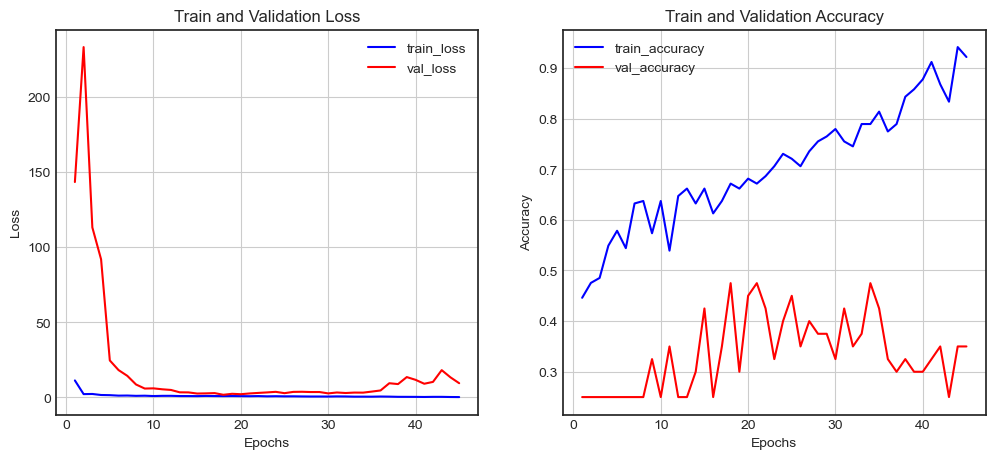

In [52]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [53]:
model.evaluate(test_X_mfcc, test_y)

2/2 [==============================] - 0s 11ms/step - loss: 9.4413 - accuracy: 0.3500


[9.441349029541016, 0.3499999940395355]

In [54]:
# 예측값과 실제값 랜덤 비교
import numpy as np


predictions = model.predict(test_X_mfcc)

random_indices = np.random.choice(len(test_X_mfcc), 5, replace=False)

for i in random_indices:
   #랜덤 샘플에 대한 예측값과 실제값
   predicted_class = np.argmax(predictions[i])
   true_class = test_y[i]

   print(f"예측 값 : {predicted_class}, 실제 값 : {true_class}")

2/2 [==============================] - 0s 16ms/step
예측 값 : 1, 실제 값 : [0. 1. 0. 0.]
예측 값 : 1, 실제 값 : [0. 0. 0. 1.]
예측 값 : 2, 실제 값 : [1. 0. 0. 0.]
예측 값 : 1, 실제 값 : [1. 0. 0. 0.]
예측 값 : 2, 실제 값 : [0. 0. 1. 0.]


In [55]:
true_labels = np.argmax(test_y, axis=1)
true_classes = np.argmax(predictions, axis=1)

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [57]:

conf_matrix = confusion_matrix(true_labels, true_classes)


print(conf_matrix)

[[0 5 5 0]
 [1 8 1 0]
 [0 3 6 1]
 [0 8 2 0]]


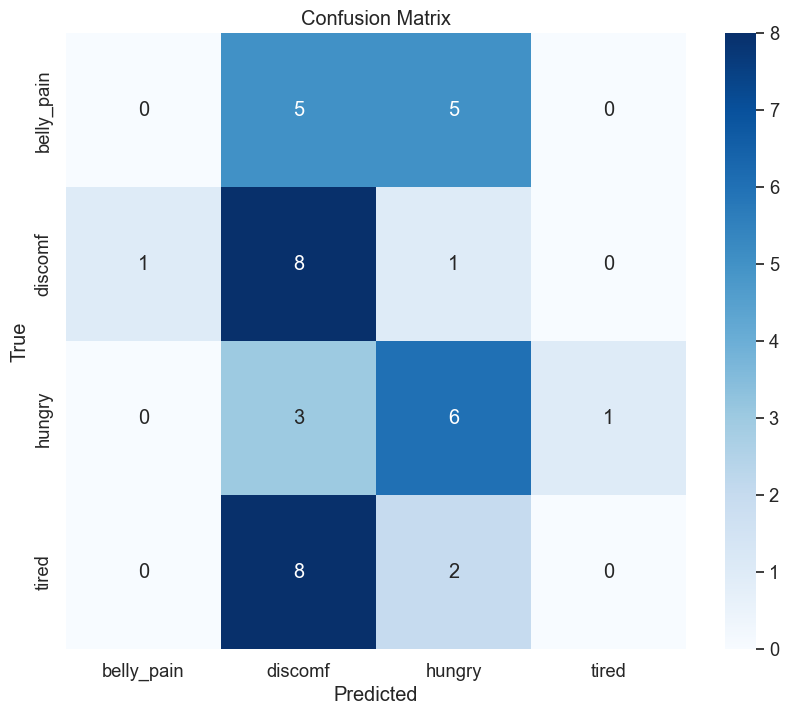

In [58]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # 폰트 크기 조절
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['belly_pain', 'discomf', 'hungry', 'tired'], yticklabels=['belly_pain', 'discomf', 'hungry', 'tired'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()